In [2]:
import pandas as pd
from tkinter import Tk
from tkinter.filedialog import askopenfilename
from datetime import datetime
from pandas import ExcelWriter
from google.colab import files



In [3]:
uploaded = files.upload()


file_name = list(uploaded.keys())[0]


if file_name.endswith(".csv"):
    balance_sheet_by_branch = pd.read_csv(file_name, header=5)
elif file_name.endswith(".xlsx") or file_name.endswith(".xls"):
    balance_sheet_by_branch = pd.read_excel(file_name, header=5)
else:
    raise ValueError("فایل باید Excel یا CSV باشد.")

balance_sheet_by_branch.columns = balance_sheet_by_branch.columns.str.strip()

Saving تراز 30 اسفند 1403 به تفکیک شعبه.csv to تراز 30 اسفند 1403 به تفکیک شعبه.csv


In [4]:
balance_sheet_by_branch = balance_sheet_by_branch.iloc[:, 1:13].dropna()
balance_sheet_by_branch["سطح"] = balance_sheet_by_branch["سطح"].astype(int)
balance_sheet_by_branch["کد سرفصل"] = balance_sheet_by_branch["کد سرفصل"].astype(str)
balance_sheet_by_branch.iloc[:, 0] = balance_sheet_by_branch.iloc[:, 0].astype(str)


for col in balance_sheet_by_branch.columns[4:]:
    balance_sheet_by_branch[col] = balance_sheet_by_branch[col].replace(",", "", regex=True)
    balance_sheet_by_branch[col] = pd.to_numeric(balance_sheet_by_branch[col], errors='coerce')


path_stack_codes = []
path_stack_titles = []
output_paths_codes = []
output_paths_titles = []
levels = []

<ipython-input-4-50a1c491ebaa>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1          1.0
2          1.0
3          1.0
4          1.0
5          1.0
         ...  
96852    998.0
96853    998.0
96854    998.0
96855    998.0
96856    998.0
Name: کد شعبه, Length: 96709, dtype: object' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  balance_sheet_by_branch.iloc[:, 0] = balance_sheet_by_branch.iloc[:, 0].astype(str)


In [5]:
for _, row in balance_sheet_by_branch.iterrows():
    level = row["سطح"]
    code = row["کد سرفصل"]
    title = str(row["عنوان"]) if pd.notna(row["عنوان"]) else ""

    # pop till matching level
    while len(path_stack_codes) >= level:
        path_stack_codes.pop()
        path_stack_titles.pop()

    path_stack_codes.append(code)
    path_stack_titles.append(title)

    output_paths_codes.append("_".join(path_stack_codes))
    output_paths_titles.append("_".join(path_stack_titles))
    levels.append(level)


In [6]:
balance_sheet_by_branch["کد نهایی"] = output_paths_codes
balance_sheet_by_branch["عنوان نهایی"] = output_paths_titles
balance_sheet_by_branch["سطح مسیر"] = levels


next_levels = levels[1:] + [0]
leaf_mask = [cur >= next for cur, next in zip(levels, next_levels)]
leaf_df = balance_sheet_by_branch[leaf_mask].copy()


In [7]:
print("📄 لطفاً فایل اطلاعات تکمیلی شعب را آپلود کنید.")
uploaded_info = files.upload()


file_path_info = list(uploaded_info.keys())[0]


if file_path_info.endswith(".csv"):
    branch_info = pd.read_csv(file_path_info)
elif file_path_info.endswith(".xlsx") or file_path_info.endswith(".xls"):
    branch_info = pd.read_excel(file_path_info)
else:
    raise ValueError("فرمت فایل باید CSV یا Excel باشد.")


branch_info.columns = branch_info.columns.str.strip()
branch_info = branch_info.rename(columns={branch_info.columns[0]: "کد شعبه"})


leaf_df["کد شعبه"] = leaf_df["کد شعبه"].astype(float).astype(int).astype(str)
branch_info["کد شعبه"] = branch_info["کد شعبه"].astype(float).astype(int).astype(str)

leaf_df = pd.merge(leaf_df, branch_info[["کد شعبه", "کد فناپ", "کد بانک مرکزی", "نام استان"]], on="کد شعبه", how="left")


now_str = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
output_path = f"خروجی_نهایی_برگ‌ها_{now_str}.xlsx"
leaf_df.to_excel(output_path, index=False)


print(leaf_df[["کد شعبه", "کد نهایی", "عنوان نهایی", "مانده(بد)", "مانده(بس)", "کد فناپ", "کد بانک مرکزی", "نام استان"]])
print(f"\n✅ خروجی شامل فقط برگ‌ها با مانده صحیح ذخیره شد: {output_path}")


📄 لطفاً فایل اطلاعات تکمیلی شعب را آپلود کنید.


Saving coding-ostan (2).xlsx to coding-ostan (2).xlsx
      کد شعبه                  کد نهایی  \
0           1  1000_1008_1085_1011_1120   
1           1  1000_1008_1085_1011_1115   
2           1       1000_1008_1106_1089   
3           1      1000_1008_1106_10892   
4           1      1000_1008_1106_10893   
...       ...                       ...   
69823     998      2000_2007_2433_23184   
69824     998      2000_2010_2093_20963   
69825     998      2000_2010_2093_20964   
69826     998       2000_2015_2090_2166   
69827     998       2000_2015_2091_2391   

                                             عنوان نهایی  مانده(بد)  \
0      حسابهاي دارائي_حسابهاي داخلي_بدهکاران داخلي/ري...  173269052   
1      حسابهاي دارائي_حسابهاي داخلي_بدهکاران داخلي/ري...          0   
2       حسابهاي دارائي_حسابهاي داخلي_حساب مركز_حساب مرکز          0   
3      حسابهاي دارائي_حسابهاي داخلي_حساب مركز_حساب مر...          0   
4      حسابهاي دارائي_حسابهاي داخلي_حساب مركز_حساب مر...          0   
...

In [8]:
!pip install XlsxWriter


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.4/169.4 kB 3.0 MB/s eta 0:00:00


In [9]:

leaf_df["کد نهایی با استان"] = leaf_df["کد نهایی"] + "_" + leaf_df["کد فناپ"].astype(str)

leaf_df["عنوان نهایی با استان"] = leaf_df["عنوان نهایی"] + "_" + leaf_df["نام استان"]

grouped_df = leaf_df.groupby(
    ["کد نهایی با استان", "عنوان نهایی با استان"], as_index=False
)[["مانده(بد)", "مانده(بس)", "مانده (بد)", "مانده (بس)"]].sum(min_count=1)


grouped_df = grouped_df[~((grouped_df["مانده(بد)"] == 0) & (grouped_df["مانده(بس)"] == 0))]

grouped_df["مانده(بد)_اصلاح‌شده"] = grouped_df["مانده(بد)"].clip(lower=0) + grouped_df["مانده(بس)"].clip(upper=0).abs()
grouped_df["مانده(بس)_اصلاح‌شده"] = grouped_df["مانده(بس)"].clip(lower=0) + grouped_df["مانده(بد)"].clip(upper=0).abs()

grouped_df["مانده(بد)_اصلاح‌شده"] = grouped_df["مانده(بد)_اصلاح‌شده"].astype(str)
grouped_df["مانده(بس)_اصلاح‌شده"] = grouped_df["مانده(بس)_اصلاح‌شده"].astype(str)

grouped_df = grouped_df[["کد نهایی با استان", "عنوان نهایی با استان", "مانده(بد)_اصلاح‌شده", "مانده(بس)_اصلاح‌شده"]]

output_grouped_path = f"خروجی_نهایی_تجمیعی_کد_با_استان_{now_str}.xlsx"
with ExcelWriter(output_grouped_path, engine="xlsxwriter") as writer:
    # شیت بدون عنوان
    grouped_df.to_excel(writer, index=False, header=False, sheet_name="تجمیعی بدون عنوان")
    # شیت با عنوان
    grouped_df.to_excel(writer, index=False, header=True, sheet_name="تجمیعی با عنوان")

print(f"\n✅ خروجی تجمیعی فیلترشده با اصلاح مقادیر منفی و تبدیل به متن در دو شیت ذخیره شد: {output_grouped_path}")

import pandas as pd
import matplotlib.pyplot as plt



✅ خروجی تجمیعی فیلترشده با اصلاح مقادیر منفی و تبدیل به متن در دو شیت ذخیره شد: خروجی_نهایی_تجمیعی_کد_با_استان_2025-05-31_16-35-25.xlsx


In [10]:
selected_codes = [
    "2000_2001_2043_2150_2230","2000_2001_2043_2150_22300","2000_2001_2043_2150_2232","2000_2001_2043_2160_21601","2000_2001_2043_2160_21605",
    "2000_2001_2043_2160_21608","2000_2001_2043_2160_2161_21421","2000_2001_2043_2160_2190","2000_2001_2043_2160_3116","2000_2001_2030_2200",
    "2000_2001_2030_22001","2000_2001_2030_4244_4623","2000_2001_2032_2453_2639","1000_1008_1085_1250","2000_2001_2043_2150_2231","2000_2001_2043_2150_2233",
    "2000_2001_2043_2160_21602","2000_2001_2043_2160_21606","2000_2001_2043_2160_21609","2000_2001_2043_2160_2161_2142","2000_2001_2043_2160_3170",
    "2000_2001_2043_2160_3172","2000_2001_2043_3045","2000_2001_3251_35180","2000_2006_2056_2117","2000_2010_2093_2170","2000_2012_2099_2952_2662",
    "2000_2006_2126_44440","2000_2012_2113_21131","2000_2010_2109_2097","2000_2010_2109_2105","2000_2001_2030_2201","2000_2001_2030_4244_4624",
    "2000_2001_3251_35181","1000_1010_1112_11123","1000_1010_1112_11124","1000_1010_1112_1354","2000_2001_2032_2453_2648","2000_2008_20840_20841",
    "2000_2004_2048_2443","2000_2004_2050_3111","2000_2004_2107_21071","2000_2001_2034_2017_2020","2000_2001_2034_20342","2000_2001_2034_20347",
    "2000_2001_2034_20352","2000_2001_2034_20353","2000_2001_2034_2211","2000_2001_2034_2214","2000_2001_2034_2696","2000_2001_2034_3074",
    "2000_2001_2034_3076","2000_2001_2034_3079","2000_2001_2034_3140","2000_2001_2034_3177","2000_2001_2034_3210","2000_2001_2034_3266","2000_2001_2034_3272",
    "2000_2001_2034_3301","2000_2001_2034_3315","2000_2001_2034_3321","2000_2001_2034_5235","2000_2001_3251_35182","2000_2001_3251_35195","2000_2001_2036_2221_22212",
    "2000_2001_2036_2221_22215","2000_2001_2036_2221_3149","2000_2001_2036_2221_3274","2000_2001_2036_2221_3341","2000_2001_2036_2221_3353","2000_2001_2036_2221_3359",
    "2000_2001_2036_2221_3367","2000_2001_2036_2221_3370","2000_2001_2036_2222_2511","2000_2001_2036_2223_2517","2000_2001_2036_2223_25170","2000_2010_2093_2400_2588_2770",
    "2000_2001_2036_2221_22211","2000_2001_2036_2221_22214","2000_2001_2036_2221_2505","2000_2001_2036_2221_3247","2000_2001_2036_2221_3259","2000_2001_2036_2221_3269",
    "2000_2001_2036_2221_3273","2000_2001_2036_2221_3294","2000_2001_2036_2221_3340","2000_2001_2036_2221_3346","2000_2001_2036_2221_3352","2000_2001_2036_2221_3358",
    "2000_2001_2036_2221_3361","2000_2001_2036_2221_3363","2000_2001_2036_2221_3366","2000_2001_2036_2221_3368","2000_2001_2036_2222_2510","2000_2001_2036_2222_25100",
    "2000_2001_2036_2223_2516","2000_2001_2036_2223_25160","2000_2001_2035_31410","2000_2001_2035_2217","2000_2001_2035_31430","2000_2001_2034_2017_2018",
    "2000_2001_2034_2017_20181","2000_2001_2034_20341","2000_2001_2034_20346","2000_2001_2034_20350","2000_2001_2034_20351","2000_2001_2034_2210","2000_2001_2034_2213",
    "2000_2001_2034_2695","2000_2001_2034_3073","2000_2001_2034_3075","2000_2001_2034_3078","2000_2001_2034_3091_3085","2000_2001_2034_3139","2000_2001_2034_3176",
    "2000_2001_2034_3209","2000_2001_2034_3265","2000_2001_2034_3271","2000_2001_2034_3296","2000_2001_2034_3302","2000_2001_2034_3316","2000_2001_2034_3318",
    "2000_2001_2034_3320","2000_2001_2034_5234","2000_2010_2093_20935","2000_2001_2033_2452_2631","2000_2001_2033_2209_2607","1000_1010_1164_1114","2000_2010_2093_2179_23951",
    "2000_2010_2093_2179_2398_2568","2000_2010_2093_2179_2398_25680","2000_2010_2093_2179_2398_25681","2000_2010_2093_2179_2398_2572","2000_2010_2093_2179_2404_2578",
    "2000_2010_2093_2179_2404_25781","2000_2010_2093_2179_2404_25782","2000_2010_2093_2179_2398_2569","2000_2010_2093_2179_2398_25690","2000_2010_2093_2179_2404_2579",
    "2000_2010_2093_2179_2398_2570","2000_2010_2093_2179_2398_25700","2000_2010_2093_2179_2404_2580","2000_2010_2093_2179_2404_25800","2000_2010_2093_2179_2395",
    "2000_2010_2093_2179_23950","2000_2010_2093_2179_2401","2000_2010_2093_2179_24010","2000_2010_2093_2179_24011","2000_2010_2093_2179_4253_4687","2000_2010_2093_3198_3200",
    "2000_2010_2093_3198_3203","2000_2010_2093_2179_2396","2000_2010_2093_2179_23960","2000_2012_2115_4257_4660_2868","2000_2012_2115_4257_4660_28681",
    "2000_2012_2115_4257_4660_2869","2000_2012_2115_4257_4681_2871","2000_2012_2114_4211","2000_2012_2114_4213","2000_2012_2114_4215","2000_2001_20360_3371",
    "2000_2010_2093_3311","2000_2010_2093_20934","2000_2010_2094_20532","2000_2010_2094_20962"
]

In [16]:
pip install arabic_reshaper python-bidi


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.9/292.9 kB 7.3 MB/s eta 0:00:00


In [13]:
import matplotlib as mpl
mpl.rcParams['font.family'] = 'sans-serif'


TypeError: 'numpy.ndarray' object is not callable

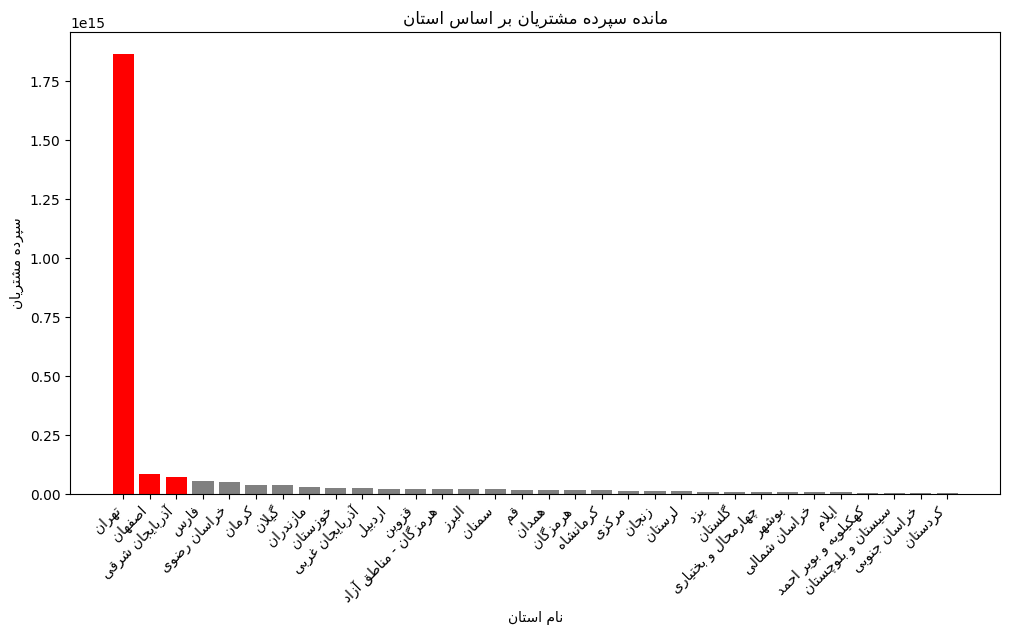

In [17]:
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display


filtered_df = leaf_df[leaf_df["کد نهایی"].isin(selected_codes)].copy()


filtered_df["مانده خالص"] = filtered_df["مانده(بس)"] - filtered_df["مانده(بد)"]


grouped = filtered_df.groupby("نام استان")["مانده خالص"].sum().sort_values(ascending=False)


reshaped_index = [get_display(arabic_reshaper.reshape(province)) for province in grouped.index]
grouped.index = reshaped_index


top3 = grouped.head(3).index
colors = ["red" if province in top3 else "gray" for province in grouped.index]


plt.figure(figsize=(12, 6))
bars = plt.bar(grouped.index, grouped.values, color=colors)


plt.title(get_display(arabic_reshaper.reshape("مانده سپرده مشتریان بر اساس استان")))
plt.xlabel(get_display(arabic_reshaper.reshape("نام استان")))
plt.ylabel(get_display(arabic_reshaper.reshape("سپرده مشتریان")))


plt.xticks(rotation=45, ha='right')


plt.tight_layout()
plt.show()



In [18]:
print(type(grouped))


<class 'pandas.core.series.Series'>


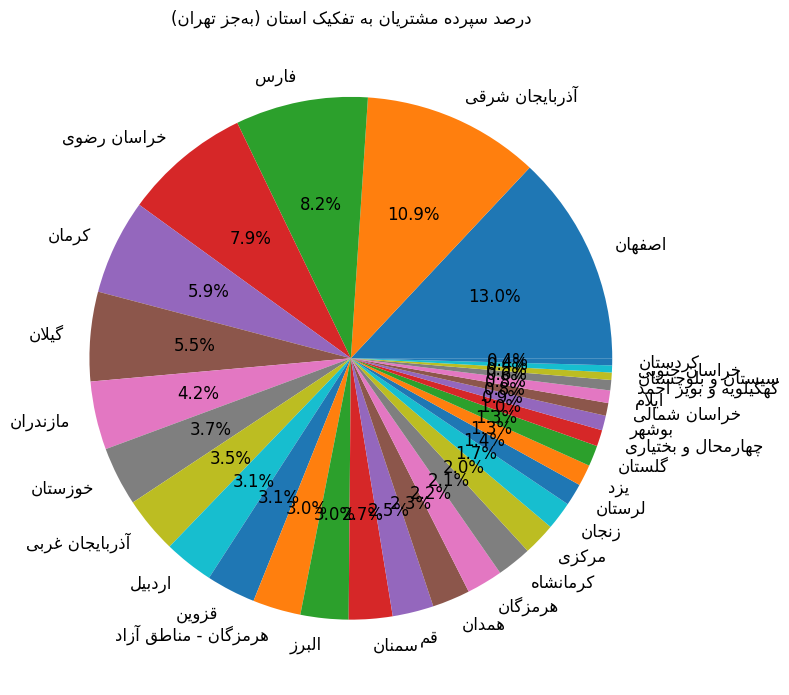

In [26]:
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display


filtered_df["مانده خالص"] = filtered_df["مانده(بس)"] - filtered_df["مانده(بد)"]
grouped = filtered_df.groupby("نام استان")["مانده خالص"].sum().sort_values(ascending=False)


grouped = grouped[grouped.index != "تهران"]


reshaped_labels = [get_display(arabic_reshaper.reshape(label)) for label in grouped.index]


plt.figure(figsize=(8, 8))
plt.pie(
    grouped.values,
    labels=reshaped_labels,
    autopct='%1.1f%%',
    textprops={'fontsize': 12}
)


title = get_display(arabic_reshaper.reshape("درصد سپرده مشتریان به تفکیک استان (به‌جز تهران)"))
plt.title(title)

plt.tight_layout()
plt.show()



📍 استان: تهران


,مانده خالص
count,"38,369"
mean,"8,947,826,188"
std,"39,445,582,632,481"
min,"-3,669,909,610,593,190"
25%,0
50%,0
75%,0
max,"6,344,787,117,759,490"


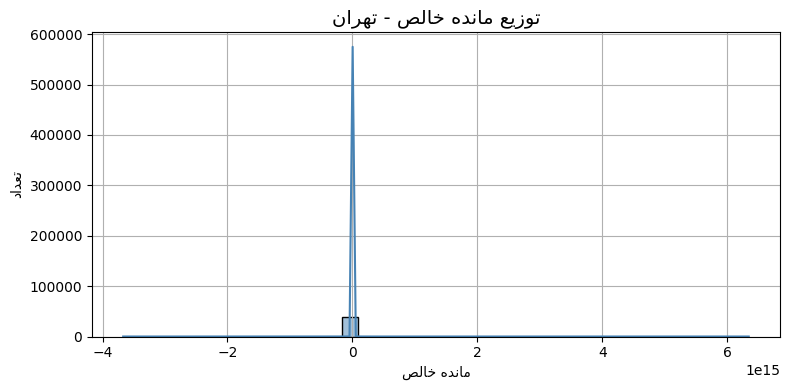

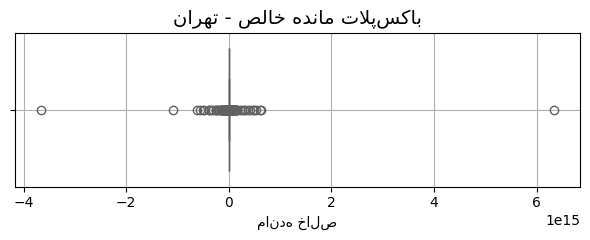


📍 استان: آذربایجان شرقی


,مانده خالص
count,"2,426"
mean,0
std,"3,886,738,132,668"
min,"-106,117,135,045,381"
25%,0
50%,0
75%,0
max,"146,392,764,441,992"


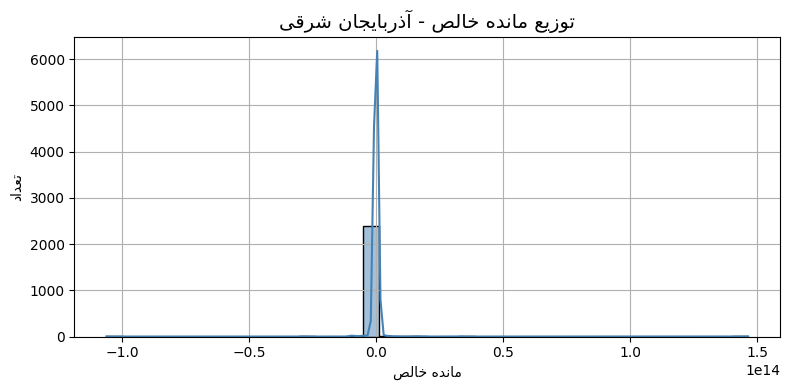

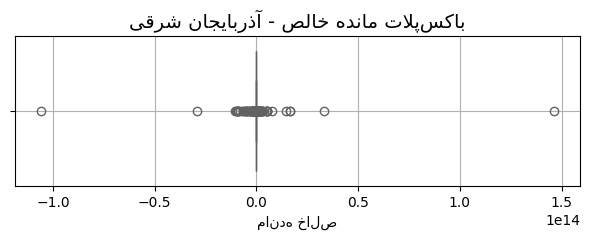


📍 استان: اردبیل


,مانده خالص
count,792
mean,0
std,"1,349,232,521,732"
min,"-20,834,772,505,329"
25%,0
50%,0
75%,0
max,"26,212,698,309,902"


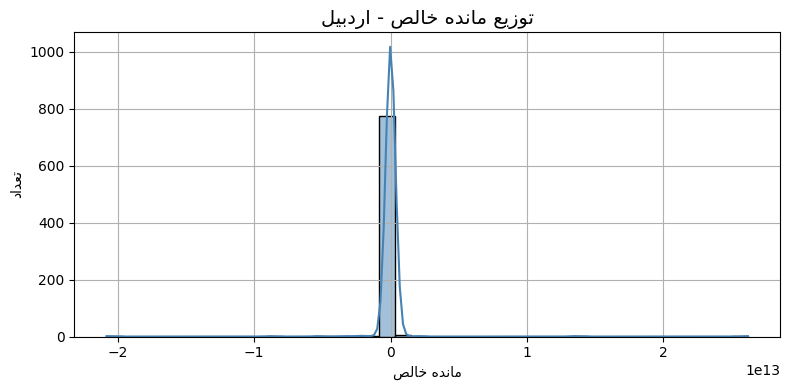

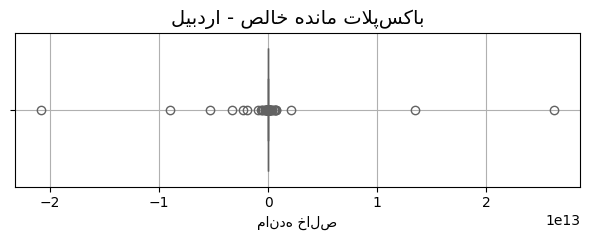


📍 استان: گلستان


,مانده خالص
count,685
mean,0
std,"490,070,336,278"
min,"-5,119,787,061,194"
25%,0
50%,0
75%,0
max,"9,111,126,258,693"


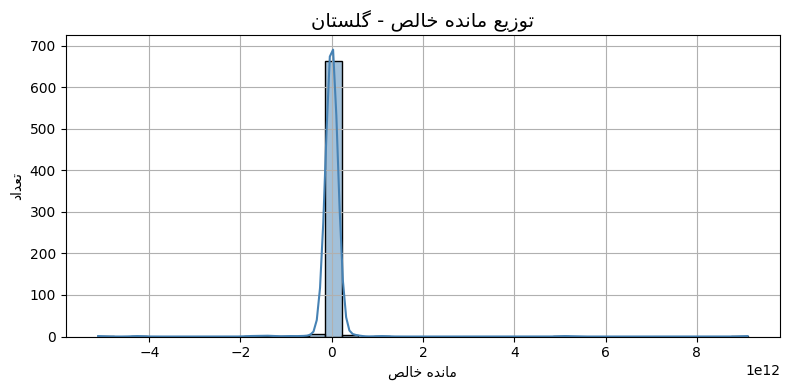

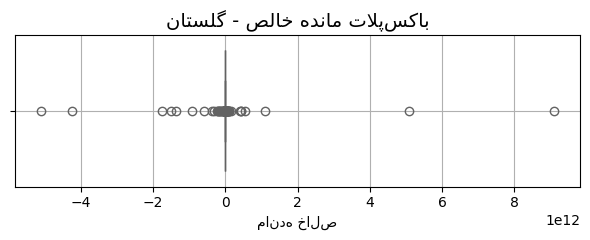


📍 استان: گیلان


,مانده خالص
count,"1,438"
mean,0
std,"797,191,210,694"
min,"-9,880,520,886,000"
25%,0
50%,0
75%,0
max,"14,032,949,033,282"


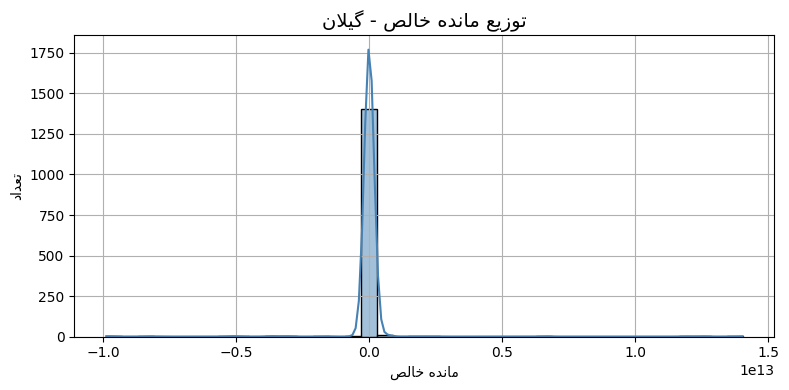

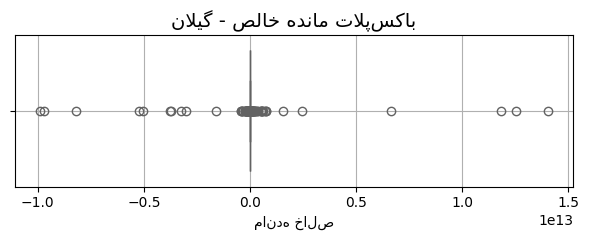


📍 استان: یزد


,مانده خالص
count,756
mean,0
std,"1,614,154,092,528"
min,"-27,516,809,750,250"
25%,0
50%,0
75%,0
max,"33,946,142,628,247"


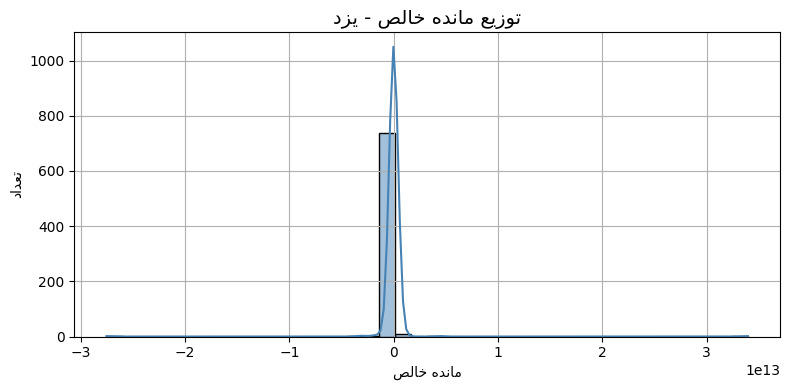

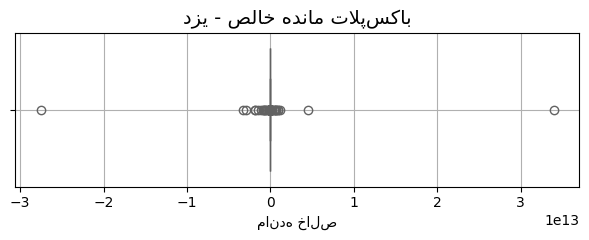

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import arabic_reshaper
from bidi.algorithm import get_display


leaf_df = leaf_df.dropna(subset=["مانده خالص"])


province_sums = leaf_df.groupby("نام استان")["مانده خالص"].sum().sort_values(ascending=False)
top3_provinces = province_sums.head(3).index.tolist()
bottom3_provinces = province_sums.tail(3).index.tolist()
selected_provinces = top3_provinces + bottom3_provinces


def persian_text(text):
    return get_display(arabic_reshaper.reshape(text))


for province in selected_provinces:
    df_province = leaf_df[leaf_df["نام استان"] == province]

    print("\n📍 استان:", province)


    desc_stats = df_province["مانده خالص"].describe().to_frame()
    desc_stats["مانده خالص"] = desc_stats["مانده خالص"].apply(lambda x: f"{x:,.0f}")
    display(desc_stats)

    plt.figure(figsize=(8, 4))
    sns.histplot(df_province["مانده خالص"], bins=40, kde=True, color="steelblue")
    plt.title(persian_text(f"توزیع مانده خالص - {province}"), fontsize=14)
    plt.xlabel(persian_text("مانده خالص"))
    plt.ylabel(persian_text("تعداد"))
    plt.grid(True)
    plt.tight_layout()
    plt.show()


    plt.figure(figsize=(6, 2.5))
    sns.boxplot(x=df_province["مانده خالص"], color="tomato")
    plt.title(persian_text(f"باکس‌پلات مانده خالص - {province}"), fontsize=14)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
